Import des bibliothèques nécessaires

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from ipywidgets import interact, widgets
import matplotlib.animation as animation
from sklearn.model_selection import train_test_split
from sklearn import neighbors

In [2]:
%matplotlib notebook

# <span style="color: #FF0000">Présentation des données utilisées</span>
<br>
Mise en mémoire des données

In [3]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

<br>
Taille des données: 70000 éléments, taille des images: 28x28 = 784

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

<br>
Changement de la forme des données pour l'affichage des images

In [6]:
images = X.reshape((-1, 28, 28))

In [7]:
images.shape

(70000, 28, 28)

Affichage d'un exemple pour chacun des chiffres

<IPython.core.display.Javascript object>


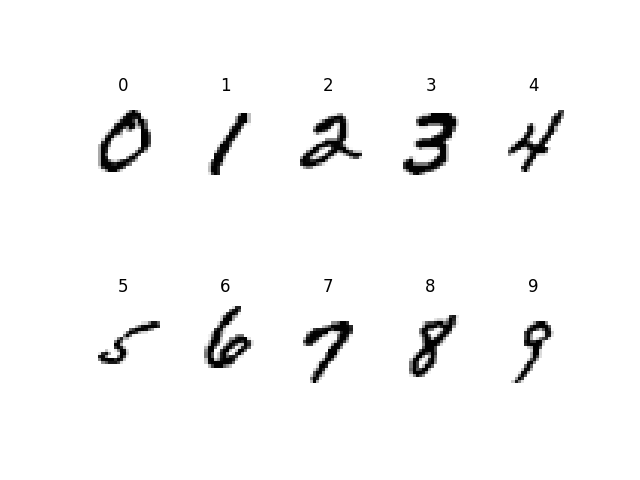

In [8]:
fig1 = plt.figure("Figure 1")
n = 0
ax1 = []
for i in range(10):
    while int(y[n])!=i:
        n+=1
    ax1.append(fig1.add_subplot(2,5,i+1))
    ax1[-1].set_title(y[n])
    ax1[-1].imshow(images[n],cmap=plt.cm.gray_r,interpolation="nearest")
    ax1[-1].axis("off")
fig1.show()

Affichage de plusieurs images représentant un même chiffre

<IPython.core.display.Javascript object>


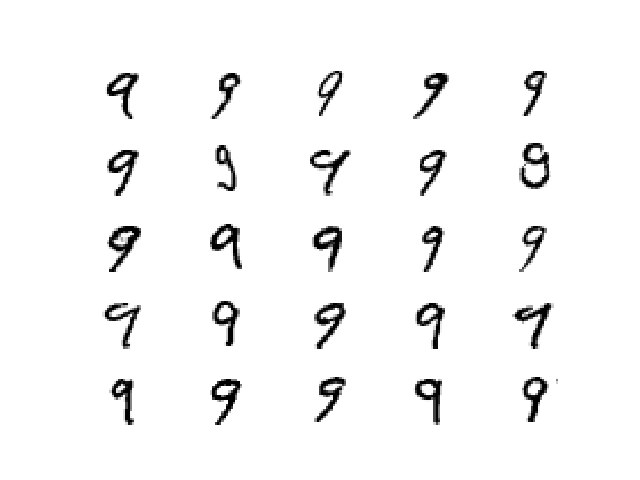

In [9]:
fig2=plt.figure("Figure 2")
ax2 = []
for i in range(1,26):
    ax2.append(fig2.add_subplot(5,5,i))
fig2.show()
    
def anime(j):
    m = j%10
    
    n = 0
    for i in range(25):
        while n<len(y) and int(y[n])!=m:
            n+=1
        if n>=len(y):
            break
   # plt.title(y[n])
        ax2[i].imshow(images[n],cmap=plt.cm.gray_r,interpolation="nearest")
        ax2[i].axis('off')
        n+=1
    n = 0
   
    

    
simulation=animation.FuncAnimation(fig2,anime,interval=1000)

# <span style="color: #FF0000">Détermination du chiffre représenté sur une image par comparaison avec k voisins</span>

## <span style="color: #00AA00">Avec un échantillon de 5000 éléments</span>

Rééchantillonnage pour réduire la taille des données (et attendre moins longtemps)

In [10]:
sample = np.random.randint(len(X), size=5000)
xsample=X[sample]
ysample=y[sample]
xtrain, xtest, ytrain, ytest = train_test_split(xsample, ysample, train_size=0.8)

In [11]:
xtrain.shape


(4000, 784)

In [12]:
xtest.shape

(1000, 784)

Pourcentage d'erreur d'identification en fonction du k choisi (on doit prendre le k pour lequel l'erreur est la plus faible)

<IPython.core.display.Javascript object>


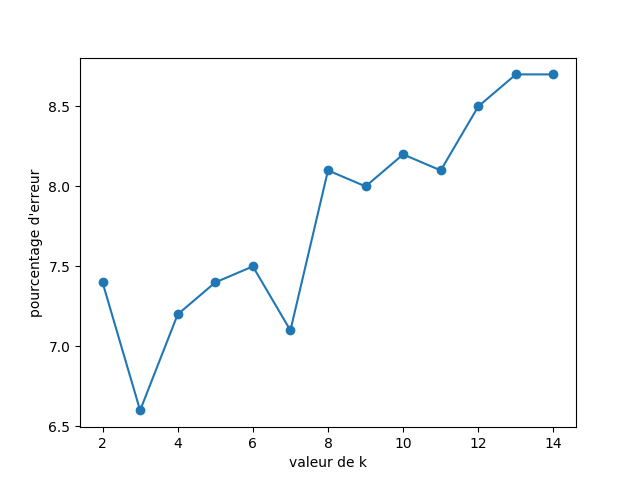

In [13]:
fig3=plt.figure("Figure 3")
ax3=fig3.add_subplot(1,1,1)
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
ax3.plot(range(2,15), errors, 'o-')
ax3.set_xlabel("valeur de k")
ax3.set_ylabel("pourcentage d'erreur")
fig3.show()

In [14]:
print("On récupère le classifieur le plus performant, k = {}, et on l'utilise pour identifier les images".format(2+errors.index(min(errors))))
knn = neighbors.KNeighborsClassifier(2+errors.index(min(errors)))
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

On récupère le classifieur le plus performant, k = 3, et on l'utilise pour identifier les images


Exemples de données mal prédites

Pourcentage d'erreurs:  6.6


<IPython.core.display.Javascript object>


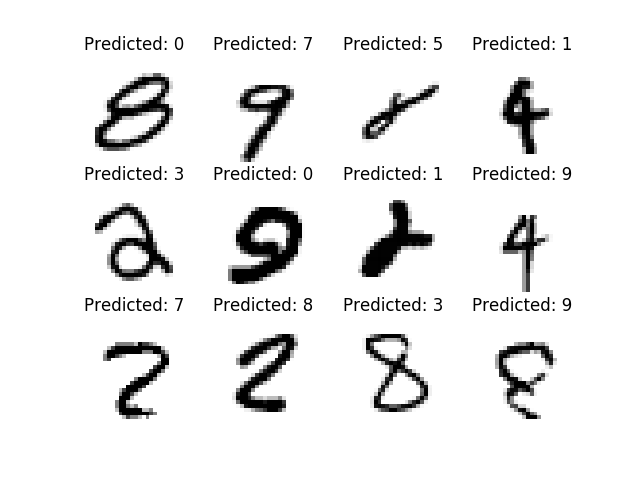

In [15]:
misclass = (ytest != predicted)
print("Pourcentage d'erreurs: ",100*np.sum(misclass)/len(misclass))
misclass_images = xtest.reshape((-1, 28, 28))[misclass,:,:]
misclass_predicted = predicted[misclass]


# on sélectionne un échantillon de 12 de ces images
select = np.arange(0, len(misclass_images))
np.random.shuffle(select)
select = select[:12]
#select = np.random.randint(misclass_images.shape[0], size=12)


# on affiche les images et les prédictions (erronées) associées à ces images
fig4 = plt.figure("Figure 4")
ax4=[]
for index, value in enumerate(select):
    ax4.append(fig4.add_subplot(3,4,index+1))
    ax4[-1].axis('off')
    ax4[-1].imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    ax4[-1].set_title('Predicted: {}'.format(misclass_predicted[value]))
fig4.show()

## <span style="color: #00AA00">Avec un échantillon de 2500 éléments</span>

In [16]:
sample = np.random.randint(len(X), size=2500)
xsample=X[sample]
ysample=y[sample]
xtrain, xtest, ytrain, ytest = train_test_split(xsample, ysample, train_size=0.8)

<IPython.core.display.Javascript object>


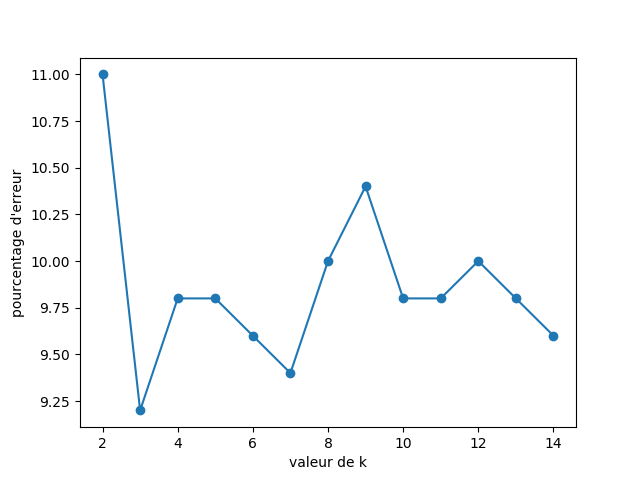

In [17]:
fig5=plt.figure("Figure 5")
ax5=fig5.add_subplot(1,1,1)
errors = []
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
ax5.plot(range(2,15), errors, 'o-')
ax5.set_xlabel("valeur de k")
ax5.set_ylabel("pourcentage d'erreur")
fig5.show()

In [18]:
print("On récupère le classifieur le plus performant, k = {}, et on l'utilise pour identifier les images".format(2+errors.index(min(errors))))
knn = neighbors.KNeighborsClassifier(2+errors.index(min(errors)))
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

On récupère le classifieur le plus performant, k = 3, et on l'utilise pour identifier les images


Pourcentage d'erreurs:  9.2


<IPython.core.display.Javascript object>


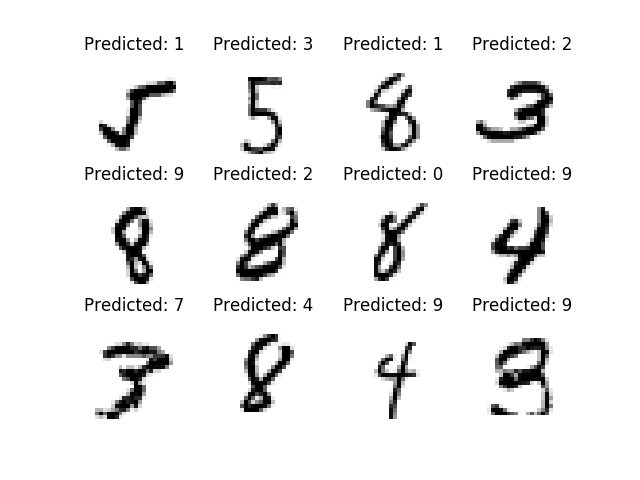

In [19]:
misclass = (ytest != predicted)
print("Pourcentage d'erreurs: ",100*np.sum(misclass)/len(misclass))
misclass_images = xtest.reshape((-1, 28, 28))[misclass,:,:]
misclass_predicted = predicted[misclass]


# on sélectionne un échantillon de 12 de ces images
select = np.arange(0, len(misclass_images))
np.random.shuffle(select)
select = select[:12]
#select = np.random.randint(misclass_images.shape[0], size=12)


# on affiche les images et les prédictions (erronées) associées à ces images
fig6 = plt.figure("Figure 6")
ax6=[]
for index, value in enumerate(select):
    ax6.append(fig6.add_subplot(3,4,index+1))
    ax6[-1].axis('off')
    ax6[-1].imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    ax6[-1].set_title('Predicted: {}'.format(misclass_predicted[value]))
fig6.show()

## <span style="color: #00AA00">Avec un échantillon de 1250 éléments</span>
(comparez le pourcentage d'erreurs d'identification)

In [20]:
sample = np.random.randint(len(X), size=1250)
xsample=X[sample]
ysample=y[sample]
xtrain, xtest, ytrain, ytest = train_test_split(xsample, ysample, train_size=0.8)

<IPython.core.display.Javascript object>


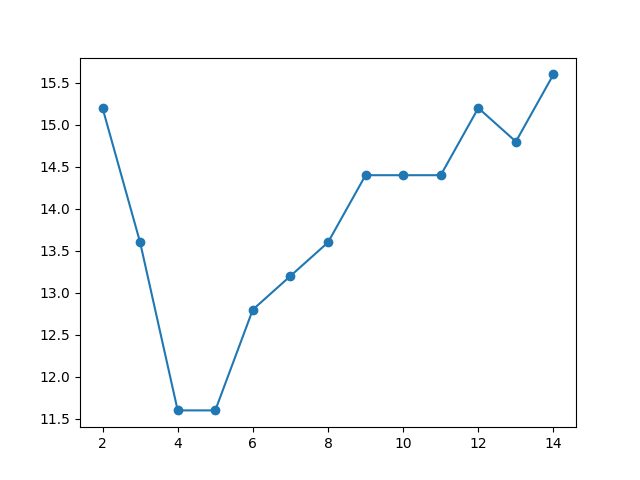

In [21]:
errors = []
fig7 = plt.figure("Figure 7")
ax7 = fig7.add_subplot(1,1,1)
for k in range(2,15):
    knn = neighbors.KNeighborsClassifier(k)
    errors.append(100*(1 - knn.fit(xtrain, ytrain).score(xtest, ytest)))
ax7.plot(range(2,15), errors, 'o-')
fig7.show()

In [22]:
print("On récupère le classifieur le plus performant, k = {}, et on l'utilise pour identifier les images".format(2+errors.index(min(errors))))
knn = neighbors.KNeighborsClassifier(2+errors.index(min(errors)))
knn.fit(xtrain, ytrain)

# On récupère les prédictions sur les données test
predicted = knn.predict(xtest)

On récupère le classifieur le plus performant, k = 4, et on l'utilise pour identifier les images


Pourcentage d'erreurs:  11.6


<IPython.core.display.Javascript object>


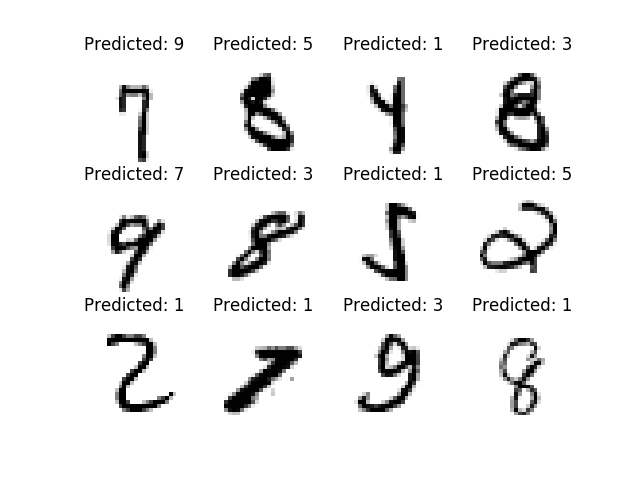

In [23]:
misclass = (ytest != predicted)
print("Pourcentage d'erreurs: ",100*np.sum(misclass)/len(misclass))
misclass_images = xtest.reshape((-1, 28, 28))[misclass,:,:]
misclass_predicted = predicted[misclass]


# on sélectionne un échantillon de ces images
select = np.arange(0, len(misclass_images))
np.random.shuffle(select)
select = select[:12]


# on affiche les images et les prédictions (erronées) associées à ces images
fig8 = plt.figure("Figure 8")
ax8=[]
for index, value in enumerate(select):
    ax8.append(fig8.add_subplot(3,4,index+1))
    ax8[-1].axis('off')
    ax8[-1].imshow(misclass_images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    ax8[-1].set_title('Predicted: {}'.format(misclass_predicted[value]))
fig8.show()

# <span style="color: #FF0000">Notion de Vrai positif, Vrai négatif, Faux positif et Faux négatif et calculs statistiques</span>

On cherche maintenant à savoir si un chiffre est un trois ou pas. Il y a donc deux réponses possibles, OUI ou NON. 

<IPython.core.display.Javascript object>


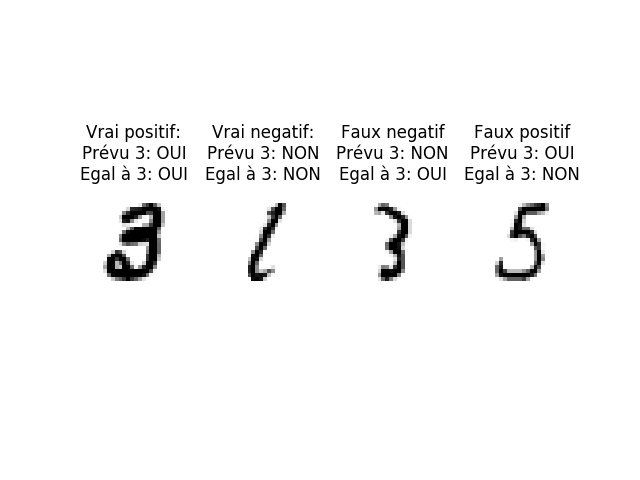

Vrai positif: 10.00 %
Vrai negatif: 87.20 %
Faux negatif: 0.40 %
Faux positif: 2.40 %

Est un trois: 10.40 %
Test positif: 12.40 %


In [40]:
estuntrois = (ytest == np.array(['3']*len(ytest)))
nestpasuntrois = (ytest != np.array(['3']*len(ytest)))
estprevutrois = (predicted == np.array(['3']*len(predicted)))
predictedtrois = predicted[estprevutrois]
ytest3 = ytest[estuntrois]
ytestautre = ytest[nestpasuntrois]
predicted3 = predicted[estuntrois]
predictedautre = predicted[nestpasuntrois]
images3 = xtest.reshape((-1, 28, 28))[estuntrois,:,:]
imagesautre = xtest.reshape((-1,28,28))[nestpasuntrois,:,:]
vraipositif = (ytest3 == predicted3)
vrainegatif = (predictedautre != np.array(['3']*len(predictedautre)))

vraipositif_images = images3[vraipositif,:,:]
vraipositif_predicted = predicted3[vraipositif]
vrainegatif_images = imagesautre[vrainegatif,:,:]
vrainegatif_predicted = predictedautre[vrainegatif]
fauxnegatif = vraipositif == np.array([False]*len(vraipositif))
fauxnegatif_images = images3[fauxnegatif,:,:]
fauxnegatif_predicted = predicted3[fauxnegatif]

fauxpositif = predictedautre == np.array(['3']*len(predictedautre))
fauxpositif_images = imagesautre[fauxpositif,:,:]
fauxpositif_predicted = predictedautre[fauxpositif]

# on affiche les images et les prédictions (erronées) associées à ces images
fig9 = plt.figure("Figure 9")
ax9=[]
ax9.append(fig9.add_subplot(1,4,1))
ax9[-1].axis('off')
ax9[-1].imshow(vraipositif_images[0],cmap=plt.cm.gray_r,interpolation="nearest")
ax9[-1].set_title('Vrai positif:\nPrévu 3: OUI\nEgal à 3: OUI')
ax9.append(fig9.add_subplot(1,4,2))
ax9[-1].axis('off')
ax9[-1].imshow(vrainegatif_images[0],cmap=plt.cm.gray_r,interpolation="nearest")
ax9[-1].set_title('Vrai negatif:\nPrévu 3: NON\nEgal à 3: NON')
ax9.append(fig9.add_subplot(1,4,3))
ax9[-1].axis('off')
ax9[-1].imshow(fauxnegatif_images[0],cmap=plt.cm.gray_r,interpolation="nearest")
ax9[-1].set_title('Faux negatif\nPrévu 3: NON\nEgal à 3: OUI')
ax9.append(fig9.add_subplot(1,4,4))
ax9[-1].axis('off')
ax9[-1].imshow(fauxpositif_images[0],cmap=plt.cm.gray_r,interpolation="nearest")
ax9[-1].set_title('Faux positif\nPrévu 3: OUI\nEgal à 3: NON')
fig9.show()
print("Vrai positif: {:.2f} %".format(100*len(vraipositif_predicted)/len(ytest)))
print("Vrai negatif: {:.2f} %".format(100*len(vrainegatif_predicted)/len(ytest)))
print("Faux negatif: {:.2f} %".format(100*len(fauxnegatif_predicted)/len(ytest)))
print("Faux positif: {:.2f} %".format(100*len(fauxpositif_predicted)/len(ytest)))
print("")
print("Est un trois: {:.2f} %".format(100*len(predicted3)/len(ytest)))
print("Test positif: {:.2f} %".format(100*len(predictedtrois)/len(ytest)))

$p(A|B)\ =\ \dfrac{p(B|A)\cdot p(A)}{p(B)}$
ici A est la proposition "est un trois"
et B est la proposition "un trois est prévu"
Ainsi la probabilité d'avoir un trois lorsque le test est B est positif est de:

In [39]:
pBA=100*len(vraipositif_predicted)/len(predicted3)
pA=100*len(predicted3)/len(ytest)
pB=100*len(predictedtrois)/len(ytest)
print("p(B|A) = {:.2f} %".format(pBA))
print("p(A) = {:.2f} %".format(pA))
print("p(B) = {:.2f} %".format(pB))
print("p(A|B) = ({:.4f}x{:.4f})/{:.4f} = {:.2f} %".format(pBA/100,pA/100,pB/100,pBA*pA/pB))
print("")
print("Donc la probabilité d'avoir effectivement un trois lorsque le test est positif est de {:.2f} %".format(pBA*pA/pB))

p(B|A) = 96.15 %
p(A) = 10.40 %
p(B) = 12.40 %
p(A|B) = (0.9615x0.1040)/0.1240 = 80.65 %

Donc la probabilité d'avoir effectivement un trois lorsque le test est positif est de 80.65 %
